In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageArea']
target = 'SalePrice'

df = df[features + [target]]

# Fill missing values with mean
df.fillna(df.mean(), inplace=True)


In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: 0.7909180297113638
RMSE: 40046.55935477162


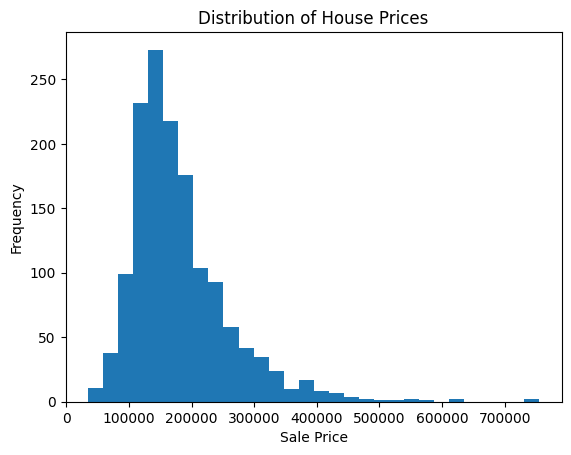

In [ ]:
plt.figure()
plt.hist(df['SalePrice'], bins=30)
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()


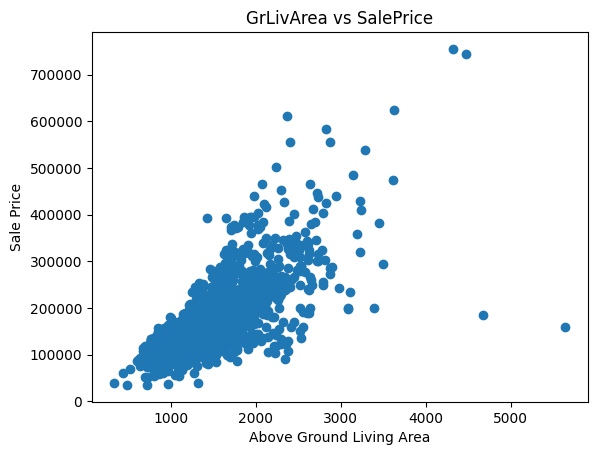

In [ ]:
plt.figure()
plt.scatter(df['GrLivArea'], df['SalePrice'])
plt.xlabel("Above Ground Living Area")
plt.ylabel("Sale Price")
plt.title("GrLivArea vs SalePrice")
plt.show()


In [ ]:
X_single = df[['GrLivArea']]
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(
    X_single, y, test_size=0.2, random_state=42
)

lr_single = LinearRegression()
lr_single.fit(X_train, y_train)

y_pred_single = lr_single.predict(X_test)


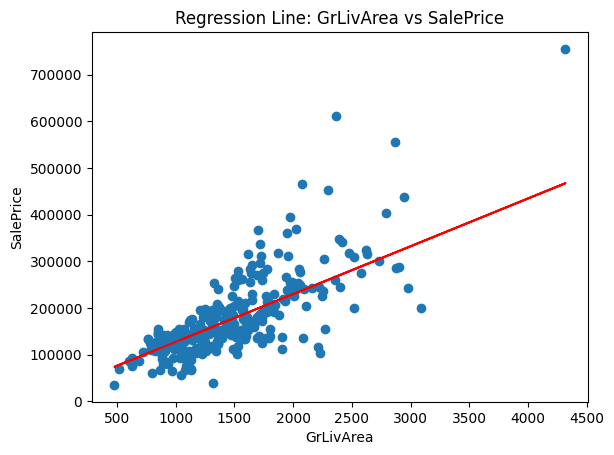

In [ ]:
plt.figure()

# Scatter plot (actual data)
plt.scatter(X_test, y_test)

# Regression line (RED)
plt.plot(X_test, y_pred_single, color='red')

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Regression Line: GrLivArea vs SalePrice")

plt.show()


In [ ]:
#LOGISTIC REGRESSION

In [ ]:
median_price = df['SalePrice'].median()
df['BuyHouse'] = (df['SalePrice'] >= median_price).astype(int)


In [ ]:
X = df[features]
y = df['BuyHouse']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8904109589041096
Confusion Matrix:
 [[145  16]
 [ 16 115]]


In [ ]:
# OUTLIER ANALYSIS (Impact on Performance)

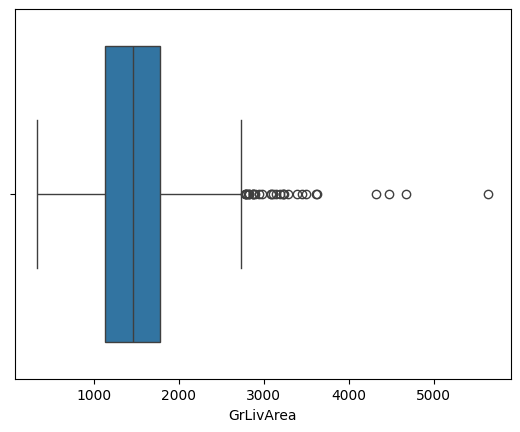

In [ ]:
sns.boxplot(x=df['GrLivArea'])
plt.show()


In [ ]:
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[
    (df['GrLivArea'] >= Q1 - 1.5 * IQR) &
    (df['GrLivArea'] <= Q3 + 1.5 * IQR)
]


In [ ]:
#OVERFITTING DETECTION

In [ ]:
#TRAIN VS TEST PERFORMANCE
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)


Training Score: -149587003890.12268
Testing Score: -142843746963.45547


In [ ]:
#CROSS VALIDATION
cv_scores = cross_val_score(lr, X, y, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


CV Scores: [0.54586198 0.53024783 0.48967074 0.52559012 0.40361368]
Mean CV Score: 0.4989968708194038


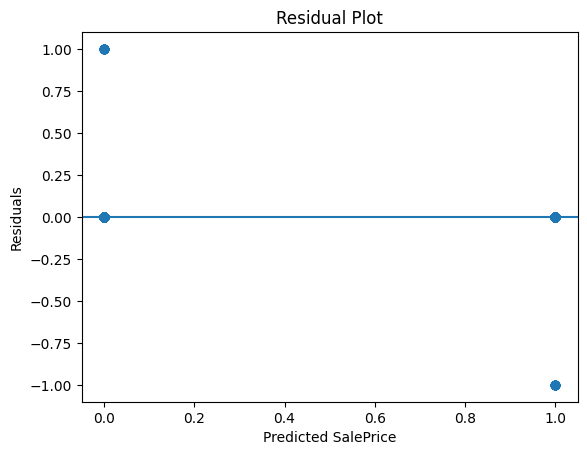

In [ ]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


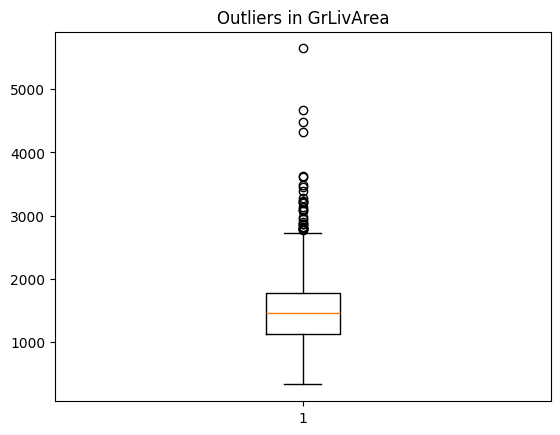

In [ ]:
plt.figure()
plt.boxplot(df['GrLivArea'])
plt.title("Outliers in GrLivArea")
plt.show()


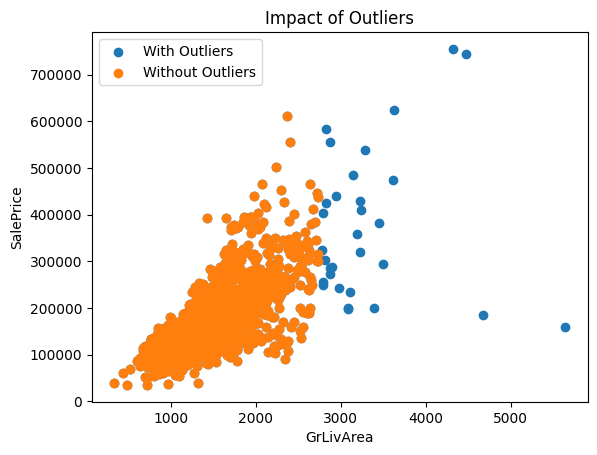

In [ ]:
plt.figure()
plt.scatter(df['GrLivArea'], df['SalePrice'], label="With Outliers")
plt.scatter(df_clean['GrLivArea'], df_clean['SalePrice'], label="Without Outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.title("Impact of Outliers")
plt.show()


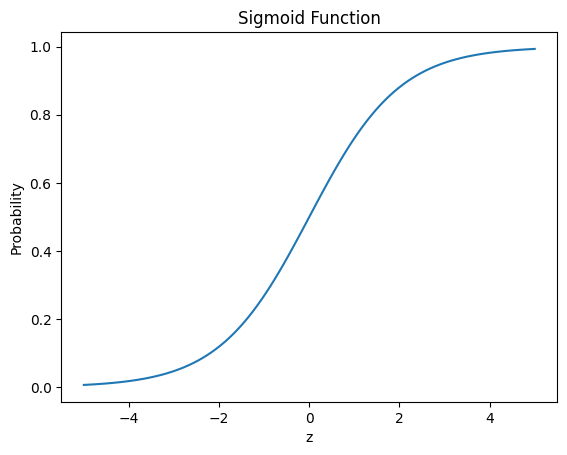

In [ ]:
x_vals = np.linspace(-5, 5, 100)
y_vals = 1 / (1 + np.exp(-x_vals))

plt.figure()
plt.plot(x_vals, y_vals)
plt.xlabel("z")
plt.ylabel("Probability")
plt.title("Sigmoid Function")
plt.show()


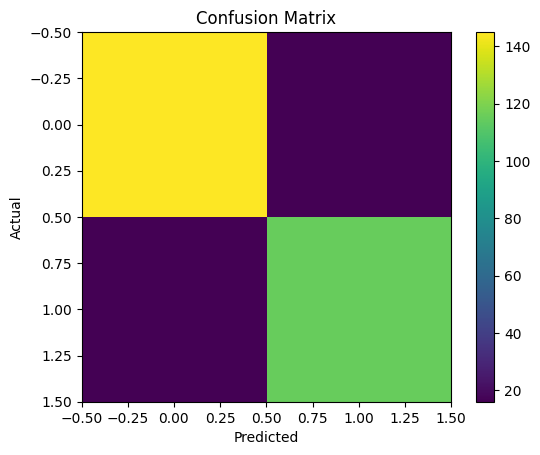

In [ ]:
plt.figure()
plt.imshow(cm)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()


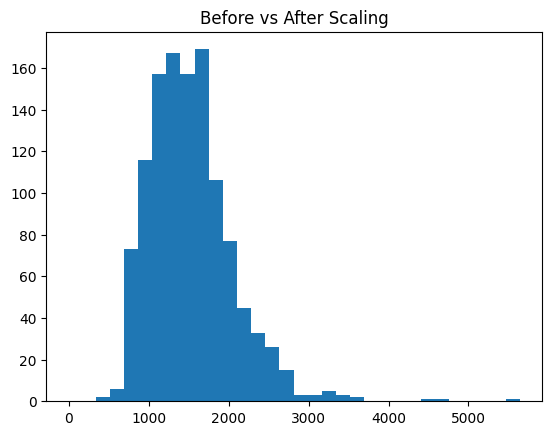

In [ ]:
plt.figure()
plt.hist(X_train['GrLivArea'], bins=30)
plt.hist(X_train_scaled[:, 0], bins=30)
plt.title("Before vs After Scaling")
plt.show()


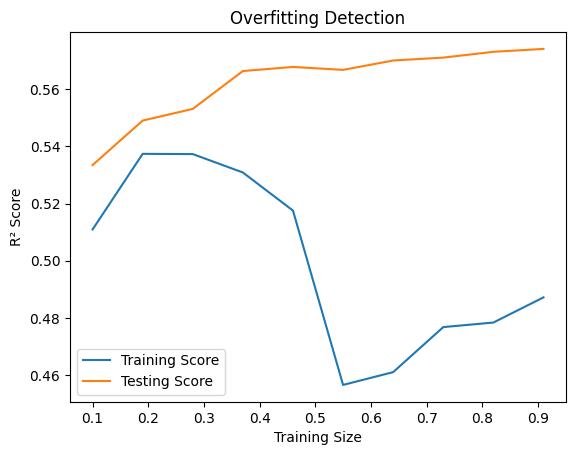

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10, endpoint=False)
train_scores = []
test_scores = []

for size in train_sizes:
    X_part, _, y_part, _ = train_test_split(
        X_train, y_train, train_size=size, random_state=42
    )
    lr.fit(X_part, y_part)
    train_scores.append(lr.score(X_part, y_part))
    test_scores.append(lr.score(X_test, y_test))

plt.figure()
plt.plot(train_sizes, train_scores, label="Training Score")
plt.plot(train_sizes, test_scores, label="Testing Score")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.legend()
plt.title("Overfitting Detection")
plt.show()
